# Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%pwd

'c:\\Users\\galib\\AI\\Projects\\TitanicMLProject\\notebooks'

In [4]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data = train_data.drop(labels=['PassengerId'],axis=1)

In [7]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:

print(f"Age column % of NaN:{round((train_data.Age.isna().sum()/len(train_data.Age)),2)*100}")

Age column % of NaN:20.0


In [9]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preprocessing

In [10]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


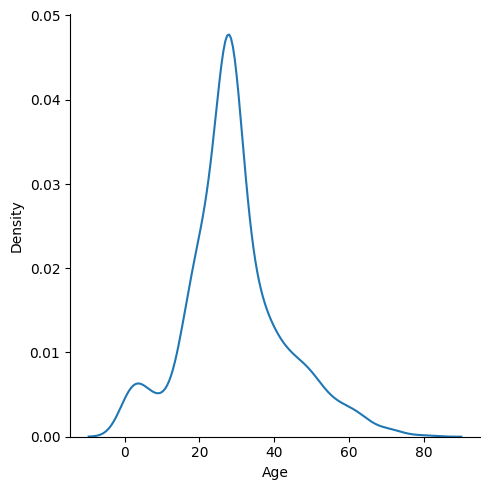

In [12]:
sns.displot(train_data,x='Age',kind='kde')

In [13]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
print(f"Cabin column % of NaN:{round((train_data.Cabin.isna().sum()/len(train_data.Cabin)),2)*100}%")

Cabin column % of NaN:77.0%


In [15]:
len(train_data.Cabin.unique())

148

In [16]:
train_data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

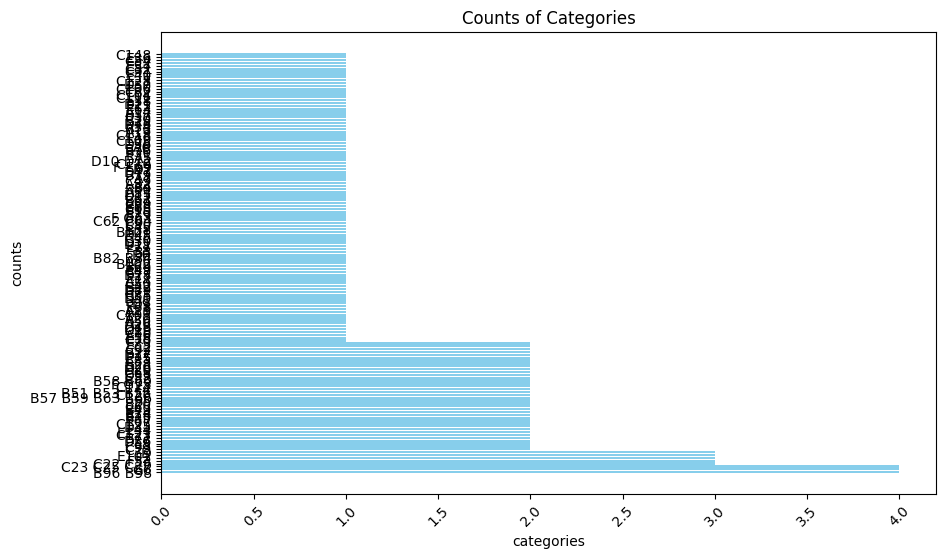

In [17]:
category_counts = train_data['Cabin'].value_counts()
plt.figure(figsize=(10,6))
plt.barh(category_counts.index,category_counts.values,color='skyblue')
plt.xlabel('categories')
plt.ylabel('counts')
plt.title('Counts of Categories')
plt.xticks(rotation=45)
plt.show()

In [18]:
train_data.Cabin.fillna('Missing',inplace=True)

In [19]:
train_data.Cabin.isna().sum()

0

In [20]:
train_data.Cabin.mode()

0    Missing
Name: Cabin, dtype: object

In [21]:
train_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [22]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
train_data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [24]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
print(f"Embarked nan : {round((train_data.Embarked.isna().sum())/len(train_data.Embarked),3)*100}%")

Embarked nan : 0.2%


In [26]:
train_data.duplicated().sum()

0

In [27]:
train_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       148
Embarked      3
dtype: int64

In [11]:
train_data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [8]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [28]:
Sorted_Fare = sorted(train_data.Fare.unique())

In [29]:
train_data[train_data.Fare == max(Sorted_Fare)]# preimer ticket

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Missing,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [30]:
train_data[train_data.Fare == min(Sorted_Fare)]# crew yard company empolyees

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,Missing,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,Missing,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,Missing,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,Missing,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,Missing,S
466,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,Missing,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,Missing,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,Missing,S
633,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,Missing,S


In [31]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 6 numerical features : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [32]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [33]:
train_data[categorical_features].describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,891,148,Missing,687
Embarked,889,3,S,644


# observation:
Ordinal features : Pclass column.<br>
Age, SibSp, Parch, Fare: These are numerical features and not considered ordinal.<br>
Name, Sex, Ticket, Cabin, Embarked: These are nominal categorical variables without a natural order.<br>
Survived : Binary column.

In [34]:
embarked_point_for_survival = train_data.groupby(train_data['Embarked'])['Survived'].mean()*100
embarked_point_for_survival

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

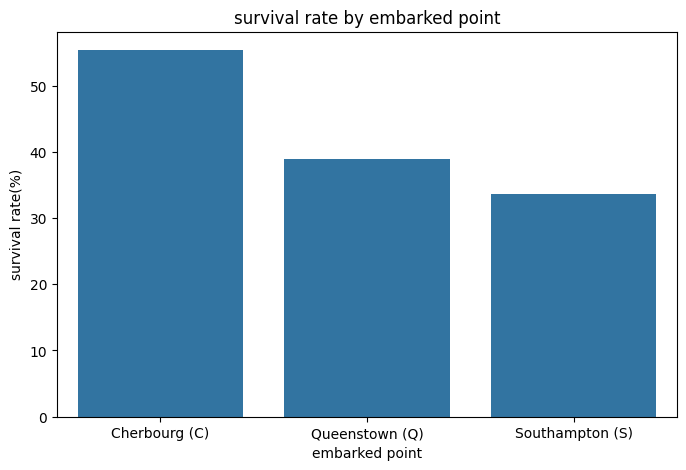

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=embarked_point_for_survival.index,y=embarked_point_for_survival.values)
plt.title("survival rate by embarked point")
plt.xlabel('embarked point')
plt.ylabel('survival rate(%)')
plt.xticks(ticks=[0,1,2],labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

In [60]:
embarked_point_paid_for_fare = train_data.groupby(train_data['Embarked'])['Fare'].mean()*100
embarked_point_paid_for_fare

Embarked
C    5995.414405
Q    1327.602987
S    2707.981180
Name: Fare, dtype: float64

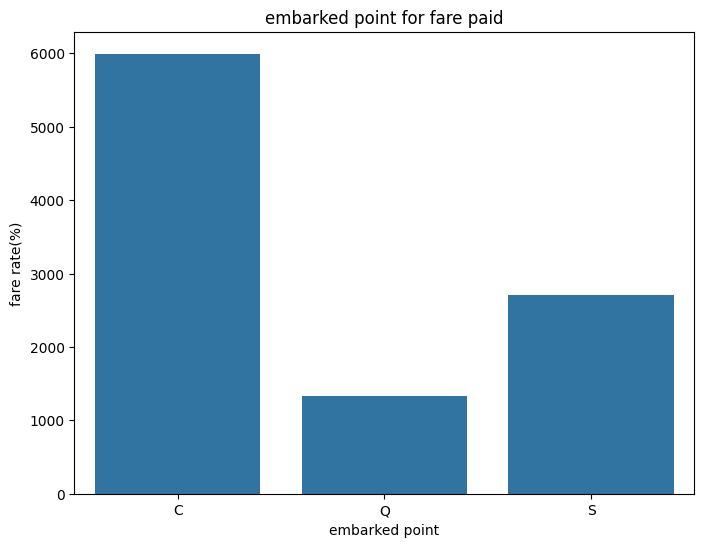

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x=embarked_point_paid_for_fare.index,y=embarked_point_paid_for_fare.values)
plt.title("embarked point for fare paid")
plt.xlabel('embarked point')
plt.ylabel('fare rate(%)')
plt.show()

In [38]:
female_passengers = train_data[train_data['Sex']=='female']

In [39]:
total_female = female_passengers['Embarked'].value_counts()

In [40]:
total_female

Embarked
S    203
C     73
Q     36
Name: count, dtype: int64

In [41]:
total_passengers = train_data['Embarked'].value_counts()
total_passengers

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
female_percentage = (total_female/total_passengers)*100

In [43]:
female_percentage

Embarked
S    31.521739
C    43.452381
Q    46.753247
Name: count, dtype: float64

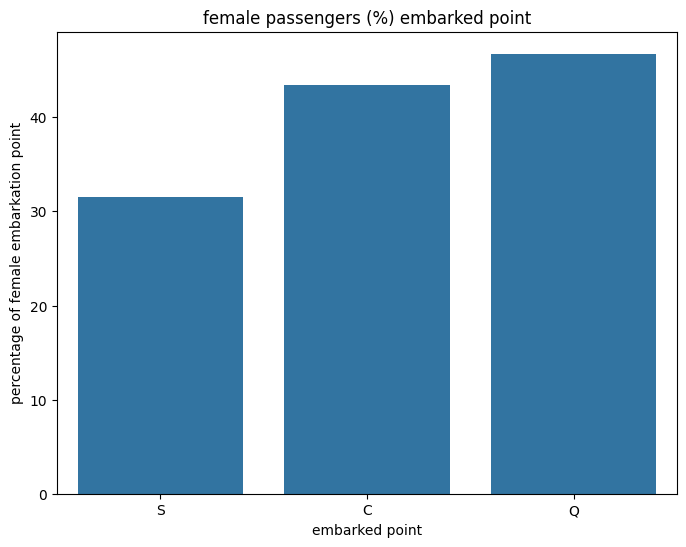

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=female_percentage.index,y=female_percentage.values)
plt.title("female passengers (%) embarked point")
plt.xlabel('embarked point')
plt.ylabel('percentage of female embarkation point')
plt.show()

In [45]:
male_paasengers = train_data[train_data['Sex']=='male']


In [46]:
male_paasengers.shape

(577, 11)

In [47]:
total_male = male_paasengers['Embarked'].value_counts()

In [48]:
total_male

Embarked
S    441
C     95
Q     41
Name: count, dtype: int64

In [49]:
male_percentage = (total_male/total_passengers)*100

In [50]:
male_percentage

Embarked
S    68.478261
C    56.547619
Q    53.246753
Name: count, dtype: float64

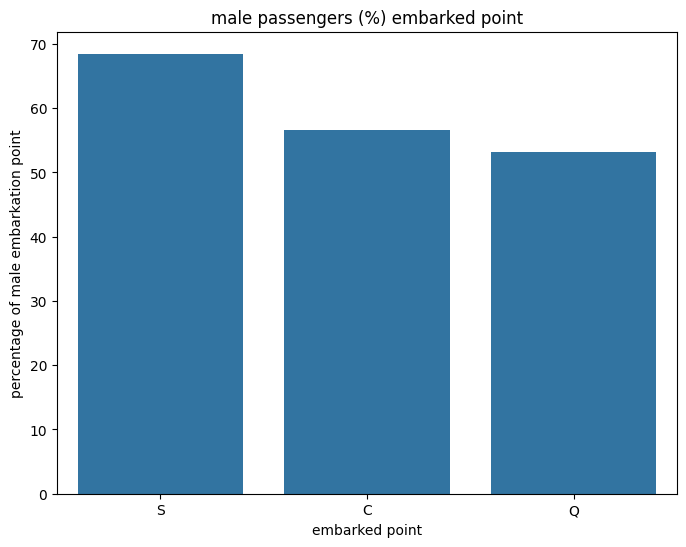

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x=male_percentage.index,y=male_percentage.values)
plt.title("male passengers (%) embarked point")
plt.xlabel('embarked point')
plt.ylabel('percentage of male embarkation point')
plt.show()

In [52]:
'''embarked_point_male = train_data.groupby(train_data['Embarked'])[train_data['Sex']=='male']
embarked_point_male'''

"embarked_point_male = train_data.groupby(train_data['Embarked'])[train_data['Sex']=='male']\nembarked_point_male"

In [68]:
summary_df=pd.DataFrame({
    'Surivial Rate(%)':embarked_point_for_survival,
    'Female Percentage (%)': female_percentage,
    'Male Percentage(%)': male_percentage,
}).fillna(0)
print(summary_df)

          Surivial Rate(%)  Female Percentage (%)  Male Percentage(%)
Embarked                                                             
C                55.357143              43.452381           56.547619
Q                38.961039              46.753247           53.246753
S                33.695652              31.521739           68.478261


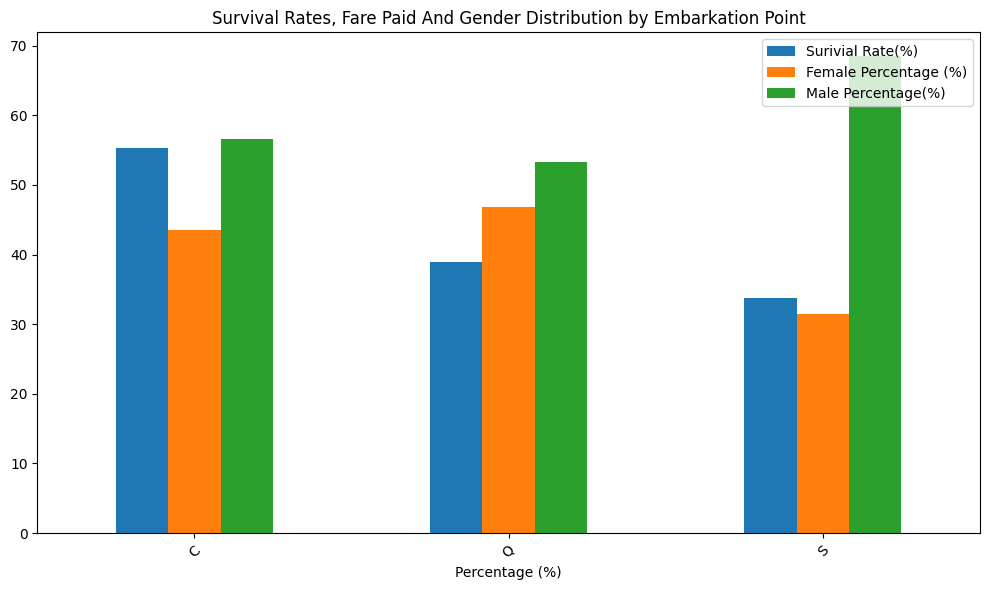

In [71]:
summary_df.plot(kind='bar',figsize=(10,6))
plt.title('Survival Rates, Fare Paid And Gender Distribution by Embarkation Point')
plt.xlabel('Embarked Point')
plt.xlabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### Gender based survival insights

In [53]:
women = train_data.loc[train_data.Sex=='female']['Survived']

In [54]:
rate_women = (sum(women)/len(women))*100

In [55]:
print(f"% of women who survived : {round(rate_women,3)}% \nlength :{len(women)} \nSum :{sum(women)}")

% of women who survived : 74.204% 
length :314 
Sum :233


In [56]:
men = train_data.loc[train_data.Sex=='male']['Survived']
men_rate = (sum(men)/len(men))*100
print(f"% of men who survived : {round(men_rate,3)}% \nlength :{len(men)} \nSum :{sum(men)}")

% of men who survived : 18.891% 
length :577 
Sum :109


In [57]:
print(f"Total population : {((len(women)/len(train_data))+(len(men)/len(train_data)))*100}% \nWomen population :{round((len(women)/len(train_data)),2)*100}% \nMen population :{round((len(men)/len(train_data)),2)*100}%")

Total population : 100.0% 
Women population :35.0% 
Men population :65.0%


In [58]:
print(f"female death percentage: {round((len(women)-sum(women))/len(women),2)*100}% \nmale death percenatge: {round((len(men)-sum(men))/len(men),2)*100}%")

female death percentage: 26.0% 
male death percenatge: 81.0%


Total population length :891 <br>
women length :314 <br>
men length :577 <br>

Women population from total population :35%<br>
% of women who survived : 74% <br>
% of women who Deceased : 26% <br>

Men population from Total population :65% <br>
% of men who survived : 19% <br>
% of men who Deceased : 81%

# Model Creation.

In [76]:
from sklearn.ensemble import RandomForestClassifier

y=train_data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':prediction})
output.to_csv('../data/Submission.csv')
print("Your Submission was successfully saved!")

Your Submission was successfully saved!
